In [6]:
import numpy  as np
import pandas as pd
import json
import pandas

In [7]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [8]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [9]:
from sklearn import cluster

In [1]:
Lamentações_1 = "How does the city sit solitary, that was full of people! how is she become as a widow! she that was great among the nations, and princess among the provinces, how is she become tributary!She weeps sore in the night, and her tears are on her cheeks: among all her lovers she has none to comfort her: all her friends have dealt treacherously with her, they are become her enemies.Judah is gone into captivity because of affliction, and because of great servitude: she dwells among the heathen, she finds no rest: all her persecutors overtook her between the straits.The ways of Zion do mourn, because none come to the solemn feasts: all her gates are desolate: her priests sigh, her virgins are afflicted, and she is in bitterness.Her adversaries are the chief, her enemies prosper; for the LORD has afflicted her for the multitude of her transgressions: her children are gone into captivity before the enemy.And from the daughter of Zion all her beauty is departed: her princes are become like harts that find no pasture, and they are gone without strength before the pursuer.Jerusalem remembered in the days of her affliction and of her miseries all her pleasant things that she had in the days of old, when her people fell into the hand of the enemy, and none did help her: the adversaries saw her, and did mock at her sabbaths.Jerusalem has grievously sinned; therefore she is removed: all that honored her despise her, because they have seen her nakedness: yes, she sighs, and turns backward.Her filthiness is in her skirts; she remembers not her last end; therefore she came down wonderfully: she had no comforter. O LORD, behold my affliction: for the enemy has magnified himself.The adversary has spread out his hand on all her pleasant things: for she has seen that the heathen entered into her sanctuary, whom you did command that they should not enter into your congregation.All her people sigh, they seek bread; they have given their pleasant things for meat to relieve the soul: see, O LORD, and consider; for I am become vile.Is it nothing to you, all you that pass by? behold, and see if there be any sorrow like to my sorrow, which is done to me, with which the LORD has afflicted me in the day of his fierce anger.From above has he sent fire into my bones, and it prevails against them: he has spread a net for my feet, he has turned me back: he has made me desolate and faint all the day.The yoke of my transgressions is bound by his hand: they are wreathed, and come up on my neck: he has made my strength to fall, the LORD has delivered me into their hands, from whom I am not able to rise up.The LORD has trodden under foot all my mighty men in the middle of me: he has called an assembly against me to crush my young men: the LORD has trodden the virgin, the daughter of Judah, as in a wine press.For these things I weep; my eye, my eye runs down with water, because the comforter that should relieve my soul is far from me: my children are desolate, because the enemy prevailed.Zion spreads forth her hands, and there is none to comfort her: the LORD has commanded concerning Jacob, that his adversaries should be round about him: Jerusalem is as a menstruous woman among them.The LORD is righteous; for I have rebelled against his commandment: hear, I pray you, all people, and behold my sorrow: my virgins and my young men are gone into captivity.I called for my lovers, but they deceived me: my priests and my elders gave up the ghost in the city, while they sought their meat to relieve their souls.Behold, O LORD; for I am in distress: my bowels are troubled; my heart is turned within me; for I have grievously rebelled: abroad the sword bereaves, at home there is as death.They have heard that I sigh: there is none to comfort me: all my enemies have heard of my trouble; they are glad that you have done it: you will bring the day that you have called, and they shall be like to me.Let all their wickedness come before you; and do to them, as you have done to me for all my transgressions: for my sighs are many, and my heart is faint.".lower()

In [2]:
Lamentações_2 = "How has the LORD covered the daughter of Zion with a cloud in his anger, and cast down from heaven to the earth the beauty of Israel, and remembered not his footstool in the day of his anger!The LORD has swallowed up all the habitations of Jacob, and has not pitied: he has thrown down in his wrath the strong holds of the daughter of Judah; he has brought them down to the ground: he has polluted the kingdom and the princes thereof.He has cut off in his fierce anger all the horn of Israel: he has drawn back his right hand from before the enemy, and he burned against Jacob like a flaming fire, which devours round about.He has bent his bow like an enemy: he stood with his right hand as an adversary, and slew all that were pleasant to the eye in the tabernacle of the daughter of Zion: he poured out his fury like fire.The LORD was as an enemy: he has swallowed up Israel, he has swallowed up all her palaces: he has destroyed his strong holds, and has increased in the daughter of Judah mourning and lamentation.And he has violently taken away his tabernacle, as if it were of a garden: he has destroyed his places of the assembly: the LORD has caused the solemn feasts and sabbaths to be forgotten in Zion, and has despised in the indignation of his anger the king and the priest.The LORD has cast off his altar, he has abhorred his sanctuary, he has given up into the hand of the enemy the walls of her palaces; they have made a noise in the house of the LORD, as in the day of a solemn feast.The LORD has purposed to destroy the wall of the daughter of Zion: he has stretched out a line, he has not withdrawn his hand from destroying: therefore he made the rampart and the wall to lament; they languished together.Her gates are sunk into the ground; he has destroyed and broken her bars: her king and her princes are among the Gentiles: the law is no more; her prophets also find no vision from the LORD.The elders of the daughter of Zion sit on the ground, and keep silence: they have cast up dust on their heads; they have girded themselves with sackcloth: the virgins of Jerusalem hang down their heads to the ground.My eyes do fail with tears, my bowels are troubled, my liver is poured on the earth, for the destruction of the daughter of my people; because the children and the sucklings swoon in the streets of the city.They say to their mothers, Where is corn and wine? when they swooned as the wounded in the streets of the city, when their soul was poured out into their mothers'bosom.What thing shall I take to witness for you? what thing shall I liken to you, O daughter of Jerusalem? what shall I equal to you, that I may comfort you, O virgin daughter of Zion? for your breach is great like the sea: who can heal you?Your prophets have seen vain and foolish things for you: and they have not discovered your iniquity, to turn away your captivity; but have seen for you false burdens and causes of banishment.All that pass by clap their hands at you; they hiss and wag their head at the daughter of Jerusalem, saying, Is this the city that men call The perfection of beauty, The joy of the whole earth?All your enemies have opened their mouth against you: they hiss and gnash the teeth: they say, We have swallowed her up: certainly this is the day that we looked for; we have found, we have seen it.The LORD has done that which he had devised; he has fulfilled his word that he had commanded in the days of old: he has thrown down, and has not pitied: and he has caused your enemy to rejoice over you, he has set up the horn of your adversaries.Their heart cried to the LORD, O wall of the daughter of Zion, let tears run down like a river day and night: give yourself no rest; let not the apple of your eye cease.Arise, cry out in the night: in the beginning of the watches pour out your heart like water before the face of the LORD: lift up your hands toward him for the life of your young children, that faint for hunger in the top of every street.Behold, O LORD, and consider to whom you have done this. Shall the women eat their fruit, and children of a span long? shall the priest and the prophet be slain in the sanctuary of the Lord?The young and the old lie on the ground in the streets: my virgins and my young men are fallen by the sword; you have slain them in the day of your anger; you have killed, and not pitied.You have called as in a solemn day my terrors round about, so that in the day of the LORD' anger none escaped nor remained: those that I have swaddled and brought up has my enemy consumed.".lower()

In [3]:
Lamentações_3 = "I AM the man that has seen affliction by the rod of his wrath.He has led me, and brought me into darkness, but not into light.Surely against me is he turned; he turns his hand against me all the day.My flesh and my skin has he made old; he has broken my bones.He has built against me, and compassed me with gall and travail.He has set me in dark places, as they that be dead of old.He has hedged me about, that I cannot get out: he has made my chain heavy.Also when I cry and shout, he shuts out my prayer.He has enclosed my ways with hewn stone, he has made my paths crooked.He was to me as a bear lying in wait, and as a lion in secret places.He has turned aside my ways, and pulled me in pieces: he has made me desolate.He has bent his bow, and set me as a mark for the arrow.He has caused the arrows of his quiver to enter into my reins.I was a derision to all my people; and their song all the day.He has filled me with bitterness, he has made me drunken with wormwood.He has also broken my teeth with gravel stones, he has covered me with ashes.And you have removed my soul far off from peace: I forgot prosperity.And I said, My strength and my hope is perished from the LORD:Remembering my affliction and my misery, the wormwood and the gall.My soul has them still in remembrance, and is humbled in me.This I recall to my mind, therefore have I hope.It is of the LORD' mercies that we are not consumed, because his compassions fail not.They are new every morning: great is your faithfulness.The LORD is my portion, said my soul; therefore will I hope in him.The LORD is good to them that wait for him, to the soul that seeks him.It is good that a man should both hope and quietly wait for the salvation of the LORD.It is good for a man that he bear the yoke of his youth.He sits alone and keeps silence, because he has borne it on him.He puts his mouth in the dust; if so be there may be hope.He gives his cheek to him that smites him: he is filled full with reproach.For the LORD will not cast off for ever:But though he cause grief, yet will he have compassion according to the multitude of his mercies.For he does not afflict willingly nor grieve the children of men.To crush under his feet all the prisoners of the earth.To turn aside the right of a man before the face of the most High,To subvert a man in his cause, the LORD approves not.Who is he that said, and it comes to pass, when the Lord commands it not?Out of the mouth of the most High proceeds not evil and good?Why does a living man complain, a man for the punishment of his sins?Let us search and try our ways, and turn again to the LORD.Let us lift up our heart with our hands to God in the heavens.We have transgressed and have rebelled: you have not pardoned.You have covered with anger, and persecuted us: you have slain, you have not pitied.You have covered yourself with a cloud, that our prayer should not pass through.You have made us as the offscouring and refuse in the middle of the people.All our enemies have opened their mouths against us.Fear and a snare is come on us, desolation and destruction.My eye runs down with rivers of water for the destruction of the daughter of my people.My eye trickles down, and ceases not, without any intermission.Till the LORD look down, and behold from heaven.My eye affects my heart because of all the daughters of my city.My enemies chased me sore, like a bird, without cause.They have cut off my life in the dungeon, and cast a stone on me.Waters flowed over my head; then I said, I am cut off.I called on your name, O LORD, out of the low dungeon.You have heard my voice: hide not your ear at my breathing, at my cry.You drew near in the day that I called on you: you said, Fear not.O LORD, you have pleaded the causes of my soul; you have redeemed my life.O LORD, you have seen my wrong: judge you my cause.You have seen all their vengeance and all their imaginations against me.You have heard their reproach, O LORD, and all their imaginations against me;The lips of those that rose up against me, and their device against me all the day.Behold their sitting down, and their rising up; I am their music.Render to them a recompense, O LORD, according to the work of their hands.Give them sorrow of heart, your curse to them.Persecute and destroy them in anger from under the heavens of the LORD.".lower()

In [4]:
Lamentações_4 = "How is the gold become dim! how is the most fine gold changed! the stones of the sanctuary are poured out in the top of every street.The precious sons of Zion, comparable to fine gold, how are they esteemed as earthen pitchers, the work of the hands of the potter!Even the sea monsters draw out the breast, they give suck to their young ones: the daughter of my people is become cruel, like the ostriches in the wilderness.The tongue of the sucking child sticks to the roof of his mouth for thirst: the young children ask bread, and no man breaks it to them.They that did feed delicately are desolate in the streets: they that were brought up in scarlet embrace dunghills.For the punishment of the iniquity of the daughter of my people is greater than the punishment of the sin of Sodom, that was overthrown as in a moment, and no hands stayed on her.Her Nazarites were purer than snow, they were whiter than milk, they were more ruddy in body than rubies, their polishing was of sapphire:Their visage is blacker than a coal; they are not known in the streets: their skin sticks to their bones; it is withered, it is become like a stick.They that be slain with the sword are better than they that be slain with hunger: for these pine away, stricken through for want of the fruits of the field.The hands of the pitiful women have sodden their own children: they were their meat in the destruction of the daughter of my people.The LORD has accomplished his fury; he has poured out his fierce anger, and has kindled a fire in Zion, and it has devoured the foundations thereof.The kings of the earth, and all the inhabitants of the world, would not have believed that the adversary and the enemy should have entered into the gates of Jerusalem.For the sins of her prophets, and the iniquities of her priests, that have shed the blood of the just in the middle of her,They have wandered as blind men in the streets, they have polluted themselves with blood, so that men could not touch their garments.They cried to them, Depart you; it is unclean; depart, depart, touch not: when they fled away and wandered, they said among the heathen, They shall no more sojourn there.The anger of the LORD has divided them; he will no more regard them: they respected not the persons of the priests, they favored not the elders.As for us, our eyes as yet failed for our vain help: in our watching we have watched for a nation that could not save us.They hunt our steps, that we cannot go in our streets: our end is near, our days are fulfilled; for our end is come.Our persecutors are swifter than the eagles of the heaven: they pursued us on the mountains, they laid wait for us in the wilderness.The breath of our nostrils, the anointed of the LORD, was taken in their pits, of whom we said, Under his shadow we shall live among the heathen.Rejoice and be glad, O daughter of Edom, that dwell in the land of Uz; the cup also shall pass through to you: you shall be drunken, and shall make yourself naked.The punishment of your iniquity is accomplished, O daughter of Zion; he will no more carry you away into captivity: he will visit your iniquity, O daughter of Edom; he will discover your sins.".lower()

In [32]:
Lamentações_5 = "Remember, O LORD, what is come on us: consider, and behold our reproach.Our inheritance is turned to strangers, our houses to aliens.We are orphans and fatherless, our mothers are as widows.We have drunken our water for money; our wood is sold to us.Our necks are under persecution: we labor, and have no rest.We have given the hand to the Egyptians, and to the Assyrians, to be satisfied with bread.Our fathers have sinned, and are not; and we have borne their iniquities.Servants have ruled over us: there is none that does deliver us out of their hand.We got our bread with the peril of our lives because of the sword of the wilderness.Our skin was black like an oven because of the terrible famine.They ravished the women in Zion, and the maids in the cities of Judah.Princes are hanged up by their hand: the faces of elders were not honored.They took the young men to grind, and the children fell under the wood.The elders have ceased from the gate, the young men from their music.The joy of our heart is ceased; our dance is turned into mourning.The crown is fallen from our head: woe to us, that we have sinned!For this our heart is faint; for these things our eyes are dim.Because of the mountain of Zion, which is desolate, the foxes walk on it.You, O LORD, remain for ever; your throne from generation to generation.Why do you forget us for ever, and forsake us so long time?Turn you us to you, O LORD, and we shall be turned; renew our days as of old.But you have utterly rejected us; you are very wroth against us.".lower()

In [33]:
tokens = nltk.word_tokenize(Lamentações_5)

In [34]:
stop_words = set(stopwords.words('english'))

In [35]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [36]:
print(filtered_sentence1)

['remember', ',', 'lord', ',', 'come', 'us', ':', 'consider', ',', 'behold', 'reproach.our', 'inheritance', 'turned', 'strangers', ',', 'houses', 'aliens.we', 'orphans', 'fatherless', ',', 'mothers', 'widows.we', 'drunken', 'water', 'money', ';', 'wood', 'sold', 'us.our', 'necks', 'persecution', ':', 'labor', ',', 'rest.we', 'given', 'hand', 'egyptians', ',', 'assyrians', ',', 'satisfied', 'bread.our', 'fathers', 'sinned', ',', ';', 'borne', 'iniquities.servants', 'ruled', 'us', ':', 'none', 'deliver', 'us', 'hand.we', 'got', 'bread', 'peril', 'lives', 'sword', 'wilderness.our', 'skin', 'black', 'like', 'oven', 'terrible', 'famine.they', 'ravished', 'women', 'zion', ',', 'maids', 'cities', 'judah.princes', 'hanged', 'hand', ':', 'faces', 'elders', 'honored.they', 'took', 'young', 'men', 'grind', ',', 'children', 'fell', 'wood.the', 'elders', 'ceased', 'gate', ',', 'young', 'men', 'music.the', 'joy', 'heart', 'ceased', ';', 'dance', 'turned', 'mourning.the', 'crown', 'fallen', 'head', '

In [37]:
data =np.array([["Lamentações_1", "'city', 'sit', 'solitary', ',', 'full', 'people', '!', 'become', 'widow', '!', 'great', 'among', 'nations', ',', 'princess', 'among', 'provinces', ',', 'become', 'tributary', '!', 'weeps', 'sore', 'night', ',', 'tears', 'cheeks', ':', 'among', 'lovers', 'none', 'comfort', ':', 'friends', 'dealt', 'treacherously', ',', 'become', 'enemies.judah', 'gone', 'captivity', 'affliction', ',', 'great', 'servitude', ':', 'dwells', 'among', 'heathen', ',', 'finds', 'rest', ':', 'persecutors', 'overtook', 'straits.the', 'ways', 'zion', 'mourn', ',', 'none', 'come', 'solemn', 'feasts', ':', 'gates', 'desolate', ':', 'priests', 'sigh', ',', 'virgins', 'afflicted', ',', 'bitterness.her', 'adversaries', 'chief', ',', 'enemies', 'prosper', ';', 'lord', 'afflicted', 'multitude', 'transgressions', ':', 'children', 'gone', 'captivity', 'enemy.and', 'daughter', 'zion', 'beauty', 'departed', ':', 'princes', 'become', 'like', 'harts', 'find', 'pasture', ',', 'gone', 'without', 'strength', 'pursuer.jerusalem', 'remembered', 'days', 'affliction', 'miseries', 'pleasant', 'things', 'days', 'old', ',', 'people', 'fell', 'hand', 'enemy', ',', 'none', 'help', ':', 'adversaries', 'saw', ',', 'mock', 'sabbaths.jerusalem', 'grievously', 'sinned', ';', 'therefore', 'removed', ':', 'honored', 'despise', ',', 'seen', 'nakedness', ':', 'yes', ',', 'sighs', ',', 'turns', 'backward.her', 'filthiness', 'skirts', ';', 'remembers', 'last', 'end', ';', 'therefore', 'came', 'wonderfully', ':', 'comforter', '.', 'lord', ',', 'behold', 'affliction', ':', 'enemy', 'magnified', 'himself.the', 'adversary', 'spread', 'hand', 'pleasant', 'things', ':', 'seen', 'heathen', 'entered', 'sanctuary', ',', 'command', 'enter', 'congregation.all', 'people', 'sigh', ',', 'seek', 'bread', ';', 'given', 'pleasant', 'things', 'meat', 'relieve', 'soul', ':', 'see', ',', 'lord', ',', 'consider', ';', 'become', 'vile.is', 'nothing', ',', 'pass', '?', 'behold', ',', 'see', 'sorrow', 'like', 'sorrow', ',', 'done', ',', 'lord', 'afflicted', 'day', 'fierce', 'anger.from', 'sent', 'fire', 'bones', ',', 'prevails', ':', 'spread', 'net', 'feet', ',', 'turned', 'back', ':', 'made', 'desolate', 'faint', 'day.the', 'yoke', 'transgressions', 'bound', 'hand', ':', 'wreathed', ',', 'come', 'neck', ':', 'made', 'strength', 'fall', ',', 'lord', 'delivered', 'hands', ',', 'able', 'rise', 'up.the', 'lord', 'trodden', 'foot', 'mighty', 'men', 'middle', ':', 'called', 'assembly', 'crush', 'young', 'men', ':', 'lord', 'trodden', 'virgin', ',', 'daughter', 'judah', ',', 'wine', 'press.for', 'things', 'weep', ';', 'eye', ',', 'eye', 'runs', 'water', ',', 'comforter', 'relieve', 'soul', 'far', ':', 'children', 'desolate', ',', 'enemy', 'prevailed.zion', 'spreads', 'forth', 'hands', ',', 'none', 'comfort', ':', 'lord', 'commanded', 'concerning', 'jacob', ',', 'adversaries', 'round', ':', 'jerusalem', 'menstruous', 'woman', 'among', 'them.the', 'lord', 'righteous', ';', 'rebelled', 'commandment', ':', 'hear', ',', 'pray', ',', 'people', ',', 'behold', 'sorrow', ':', 'virgins', 'young', 'men', 'gone', 'captivity.i', 'called', 'lovers', ',', 'deceived', ':', 'priests', 'elders', 'gave', 'ghost', 'city', ',', 'sought', 'meat', 'relieve', 'souls.behold', ',', 'lord', ';', 'distress', ':', 'bowels', 'troubled', ';', 'heart', 'turned', 'within', ';', 'grievously', 'rebelled', ':', 'abroad', 'sword', 'bereaves', ',', 'home', 'death.they', 'heard', 'sigh', ':', 'none', 'comfort', ':', 'enemies', 'heard', 'trouble', ';', 'glad', 'done', ':', 'bring', 'day', 'called', ',', 'shall', 'like', 'me.let', 'wickedness', 'come', ';', ',', 'done', 'transgressions', ':', 'sighs', 'many', ',', 'heart', 'faint', '.'"],
               ["Lamentações_2", "'lord', 'covered', 'daughter', 'zion', 'cloud', 'anger', ',', 'cast', 'heaven', 'earth', 'beauty', 'israel', ',', 'remembered', 'footstool', 'day', 'anger', '!', 'lord', 'swallowed', 'habitations', 'jacob', ',', 'pitied', ':', 'thrown', 'wrath', 'strong', 'holds', 'daughter', 'judah', ';', 'brought', 'ground', ':', 'polluted', 'kingdom', 'princes', 'thereof.he', 'cut', 'fierce', 'anger', 'horn', 'israel', ':', 'drawn', 'back', 'right', 'hand', 'enemy', ',', 'burned', 'jacob', 'like', 'flaming', 'fire', ',', 'devours', 'round', 'about.he', 'bent', 'bow', 'like', 'enemy', ':', 'stood', 'right', 'hand', 'adversary', ',', 'slew', 'pleasant', 'eye', 'tabernacle', 'daughter', 'zion', ':', 'poured', 'fury', 'like', 'fire.the', 'lord', 'enemy', ':', 'swallowed', 'israel', ',', 'swallowed', 'palaces', ':', 'destroyed', 'strong', 'holds', ',', 'increased', 'daughter', 'judah', 'mourning', 'lamentation.and', 'violently', 'taken', 'away', 'tabernacle', ',', 'garden', ':', 'destroyed', 'places', 'assembly', ':', 'lord', 'caused', 'solemn', 'feasts', 'sabbaths', 'forgotten', 'zion', ',', 'despised', 'indignation', 'anger', 'king', 'priest.the', 'lord', 'cast', 'altar', ',', 'abhorred', 'sanctuary', ',', 'given', 'hand', 'enemy', 'walls', 'palaces', ';', 'made', 'noise', 'house', 'lord', ',', 'day', 'solemn', 'feast.the', 'lord', 'purposed', 'destroy', 'wall', 'daughter', 'zion', ':', 'stretched', 'line', ',', 'withdrawn', 'hand', 'destroying', ':', 'therefore', 'made', 'rampart', 'wall', 'lament', ';', 'languished', 'together.her', 'gates', 'sunk', 'ground', ';', 'destroyed', 'broken', 'bars', ':', 'king', 'princes', 'among', 'gentiles', ':', 'law', ';', 'prophets', 'also', 'find', 'vision', 'lord.the', 'elders', 'daughter', 'zion', 'sit', 'ground', ',', 'keep', 'silence', ':', 'cast', 'dust', 'heads', ';', 'girded', 'sackcloth', ':', 'virgins', 'jerusalem', 'hang', 'heads', 'ground.my', 'eyes', 'fail', 'tears', ',', 'bowels', 'troubled', ',', 'liver', 'poured', 'earth', ',', 'destruction', 'daughter', 'people', ';', 'children', 'sucklings', 'swoon', 'streets', 'city.they', 'say', 'mothers', ',', 'corn', 'wine', '?', 'swooned', 'wounded', 'streets', 'city', ',', 'soul', 'poured', mothers'bosom.what, 'thing', 'shall', 'take', 'witness', '?', 'thing', 'shall', 'liken', ',', 'daughter', 'jerusalem', '?', 'shall', 'equal', ',', 'may', 'comfort', ',', 'virgin', 'daughter', 'zion', '?', 'breach', 'great', 'like', 'sea', ':', 'heal', '?', 'prophets', 'seen', 'vain', 'foolish', 'things', ':', 'discovered', 'iniquity', ',', 'turn', 'away', 'captivity', ';', 'seen', 'false', 'burdens', 'causes', 'banishment.all', 'pass', 'clap', 'hands', ';', 'hiss', 'wag', 'head', 'daughter', 'jerusalem', ',', 'saying', ',', 'city', 'men', 'call', 'perfection', 'beauty', ',', 'joy', 'whole', 'earth', '?', 'enemies', 'opened', 'mouth', ':', 'hiss', 'gnash', 'teeth', ':', 'say', ',', 'swallowed', ':', 'certainly', 'day', 'looked', ';', 'found', ',', 'seen', 'it.the', 'lord', 'done', 'devised', ';', 'fulfilled', 'word', 'commanded', 'days', 'old', ':', 'thrown', ',', 'pitied', ':', 'caused', 'enemy', 'rejoice', ',', 'set', 'horn', 'adversaries.their', 'heart', 'cried', 'lord', ',', 'wall', 'daughter', 'zion', ',', 'let', 'tears', 'run', 'like', 'river', 'day', 'night', ':', 'give', 'rest', ';', 'let', 'apple', 'eye', 'cease.arise', ',', 'cry', 'night', ':', 'beginning', 'watches', 'pour', 'heart', 'like', 'water', 'face', 'lord', ':', 'lift', 'hands', 'toward', 'life', 'young', 'children', ',', 'faint', 'hunger', 'top', 'every', 'street.behold', ',', 'lord', ',', 'consider', 'done', '.', 'shall', 'women', 'eat', 'fruit', ',', 'children', 'span', 'long', '?', 'shall', 'priest', 'prophet', 'slain', 'sanctuary', 'lord', '?', 'young', 'old', 'lie', 'ground', 'streets', ':', 'virgins', 'young', 'men', 'fallen', 'sword', ';', 'slain', 'day', 'anger', ';', 'killed', ',', 'pitied.you', 'called', 'solemn', 'day', 'terrors', 'round', ',', 'day', 'lord', ', 'anger', 'none', 'escaped', 'remained', ':', 'swaddled', 'brought', 'enemy', 'consumed', '.'"],
               ["Lamentações_3", "'man', 'seen', 'affliction', 'rod', 'wrath.he', 'led', ',', 'brought', 'darkness', ',', 'light.surely', 'turned', ';', 'turns', 'hand', 'day.my', 'flesh', 'skin', 'made', 'old', ';', 'broken', 'bones.he', 'built', ',', 'compassed', 'gall', 'travail.he', 'set', 'dark', 'places', ',', 'dead', 'old.he', 'hedged', ',', 'get', ':', 'made', 'chain', 'heavy.also', 'cry', 'shout', ',', 'shuts', 'prayer.he', 'enclosed', 'ways', 'hewn', 'stone', ',', 'made', 'paths', 'crooked.he', 'bear', 'lying', 'wait', ',', 'lion', 'secret', 'places.he', 'turned', 'aside', 'ways', ',', 'pulled', 'pieces', ':', 'made', 'desolate.he', 'bent', 'bow', ',', 'set', 'mark', 'arrow.he', 'caused', 'arrows', 'quiver', 'enter', 'reins.i', 'derision', 'people', ';', 'song', 'day.he', 'filled', 'bitterness', ',', 'made', 'drunken', 'wormwood.he', 'also', 'broken', 'teeth', 'gravel', 'stones', ',', 'covered', 'ashes.and', 'removed', 'soul', 'far', 'peace', ':', 'forgot', 'prosperity.and', 'said', ',', 'strength', 'hope', 'perished', 'lord', ':', 'remembering', 'affliction', 'misery', ',', 'wormwood', 'gall.my', 'soul', 'still', 'remembrance', ',', 'humbled', 'me.this', 'recall', 'mind', ',', 'therefore', 'hope.it', 'lord', ', 'mercies', 'consumed', ',', 'compassions', 'fail', 'not.they', 'new', 'every', 'morning', ':', 'great', 'faithfulness.the', 'lord', 'portion', ',', 'said', 'soul', ';', 'therefore', 'hope', 'him.the', 'lord', 'good', 'wait', ',', 'soul', 'seeks', 'him.it', 'good', 'man', 'hope', 'quietly', 'wait', 'salvation', 'lord.it', 'good', 'man', 'bear', 'yoke', 'youth.he', 'sits', 'alone', 'keeps', 'silence', ',', 'borne', 'him.he', 'puts', 'mouth', 'dust', ';', 'may', 'hope.he', 'gives', 'cheek', 'smites', ':', 'filled', 'full', 'reproach.for', 'lord', 'cast', 'ever', ':', 'though', 'cause', 'grief', ',', 'yet', 'compassion', 'according', 'multitude', 'mercies.for', 'afflict', 'willingly', 'grieve', 'children', 'men.to', 'crush', 'feet', 'prisoners', 'earth.to', 'turn', 'aside', 'right', 'man', 'face', 'high', ',', 'subvert', 'man', 'cause', ',', 'lord', 'approves', 'not.who', 'said', ',', 'comes', 'pass', ',', 'lord', 'commands', '?', 'mouth', 'high', 'proceeds', 'evil', 'good', '?', 'living', 'man', 'complain', ',', 'man', 'punishment', 'sins', '?', 'let', 'us', 'search', 'try', 'ways', ',', 'turn', 'lord.let', 'us', 'lift', 'heart', 'hands', 'god', 'heavens.we', 'transgressed', 'rebelled', ':', 'pardoned.you', 'covered', 'anger', ',', 'persecuted', 'us', ':', 'slain', ',', 'pitied.you', 'covered', 'cloud', ',', 'prayer', 'pass', 'through.you', 'made', 'us', 'offscouring', 'refuse', 'middle', 'people.all', 'enemies', 'opened', 'mouths', 'us.fear', 'snare', 'come', 'us', ',', 'desolation', 'destruction.my', 'eye', 'runs', 'rivers', 'water', 'destruction', 'daughter', 'people.my', 'eye', 'trickles', ',', 'ceases', ',', 'without', 'intermission.till', 'lord', 'look', ',', 'behold', 'heaven.my', 'eye', 'affects', 'heart', 'daughters', 'city.my', 'enemies', 'chased', 'sore', ',', 'like', 'bird', ',', 'without', 'cause.they', 'cut', 'life', 'dungeon', ',', 'cast', 'stone', 'me.waters', 'flowed', 'head', ';', 'said', ',', 'cut', 'off.i', 'called', 'name', ',', 'lord', ',', 'low', 'dungeon.you', 'heard', 'voice', ':', 'hide', 'ear', 'breathing', ',', 'cry.you', 'drew', 'near', 'day', 'called', ':', 'said', ',', 'fear', 'not.o', 'lord', ',', 'pleaded', 'causes', 'soul', ';', 'redeemed', 'life.o', 'lord', ',', 'seen', 'wrong', ':', 'judge', 'cause.you', 'seen', 'vengeance', 'imaginations', 'me.you', 'heard', 'reproach', ',', 'lord', ',', 'imaginations', ';', 'lips', 'rose', ',', 'device', 'day.behold', 'sitting', ',', 'rising', ';', 'music.render', 'recompense', ',', 'lord', ',', 'according', 'work', 'hands.give', 'sorrow', 'heart', ',', 'curse', 'them.persecute', 'destroy', 'anger', 'heavens', 'lord', '.'"],
               ["Lamentações_4", "'gold', 'become', 'dim', '!', 'fine', 'gold', 'changed', '!', 'stones', 'sanctuary', 'poured', 'top', 'every', 'street.the', 'precious', 'sons', 'zion', ',', 'comparable', 'fine', 'gold', ',', 'esteemed', 'earthen', 'pitchers', ',', 'work', 'hands', 'potter', '!', 'even', 'sea', 'monsters', 'draw', 'breast', ',', 'give', 'suck', 'young', 'ones', ':', 'daughter', 'people', 'become', 'cruel', ',', 'like', 'ostriches', 'wilderness.the', 'tongue', 'sucking', 'child', 'sticks', 'roof', 'mouth', 'thirst', ':', 'young', 'children', 'ask', 'bread', ',', 'man', 'breaks', 'them.they', 'feed', 'delicately', 'desolate', 'streets', ':', 'brought', 'scarlet', 'embrace', 'dunghills.for', 'punishment', 'iniquity', 'daughter', 'people', 'greater', 'punishment', 'sin', 'sodom', ',', 'overthrown', 'moment', ',', 'hands', 'stayed', 'her.her', 'nazarites', 'purer', 'snow', ',', 'whiter', 'milk', ',', 'ruddy', 'body', 'rubies', ',', 'polishing', 'sapphire', ':', 'visage', 'blacker', 'coal', ';', 'known', 'streets', ':', 'skin', 'sticks', 'bones', ';', 'withered', ',', 'become', 'like', 'stick.they', 'slain', 'sword', 'better', 'slain', 'hunger', ':', 'pine', 'away', ',', 'stricken', 'want', 'fruits', 'field.the', 'hands', 'pitiful', 'women', 'sodden', 'children', ':', 'meat', 'destruction', 'daughter', 'people.the', 'lord', 'accomplished', 'fury', ';', 'poured', 'fierce', 'anger', ',', 'kindled', 'fire', 'zion', ',', 'devoured', 'foundations', 'thereof.the', 'kings', 'earth', ',', 'inhabitants', 'world', ',', 'would', 'believed', 'adversary', 'enemy', 'entered', 'gates', 'jerusalem.for', 'sins', 'prophets', ',', 'iniquities', 'priests', ',', 'shed', 'blood', 'middle', ',', 'wandered', 'blind', 'men', 'streets', ',', 'polluted', 'blood', ',', 'men', 'could', 'touch', 'garments.they', 'cried', ',', 'depart', ';', 'unclean', ';', 'depart', ',', 'depart', ',', 'touch', ':', 'fled', 'away', 'wandered', ',', 'said', 'among', 'heathen', ',', 'shall', 'sojourn', 'there.the', 'anger', 'lord', 'divided', ';', 'regard', ':', 'respected', 'persons', 'priests', ',', 'favored', 'elders.as', 'us', ',', 'eyes', 'yet', 'failed', 'vain', 'help', ':', 'watching', 'watched', 'nation', 'could', 'save', 'us.they', 'hunt', 'steps', ',', 'go', 'streets', ':', 'end', 'near', ',', 'days', 'fulfilled', ';', 'end', 'come.our', 'persecutors', 'swifter', 'eagles', 'heaven', ':', 'pursued', 'us', 'mountains', ',', 'laid', 'wait', 'us', 'wilderness.the', 'breath', 'nostrils', ',', 'anointed', 'lord', ',', 'taken', 'pits', ',', 'said', ',', 'shadow', 'shall', 'live', 'among', 'heathen.rejoice', 'glad', ',', 'daughter', 'edom', ',', 'dwell', 'land', 'uz', ';', 'cup', 'also', 'shall', 'pass', ':', 'shall', 'drunken', ',', 'shall', 'make', 'naked.the', 'punishment', 'iniquity', 'accomplished', ',', 'daughter', 'zion', ';', 'carry', 'away', 'captivity', ':', 'visit', 'iniquity', ',', 'daughter', 'edom', ';', 'discover', 'sins', '.'"],
               ["Lamentações_5", "'remember', ',', 'lord', ',', 'come', 'us', ':', 'consider', ',', 'behold', 'reproach.our', 'inheritance', 'turned', 'strangers', ',', 'houses', 'aliens.we', 'orphans', 'fatherless', ',', 'mothers', 'widows.we', 'drunken', 'water', 'money', ';', 'wood', 'sold', 'us.our', 'necks', 'persecution', ':', 'labor', ',', 'rest.we', 'given', 'hand', 'egyptians', ',', 'assyrians', ',', 'satisfied', 'bread.our', 'fathers', 'sinned', ',', ';', 'borne', 'iniquities.servants', 'ruled', 'us', ':', 'none', 'deliver', 'us', 'hand.we', 'got', 'bread', 'peril', 'lives', 'sword', 'wilderness.our', 'skin', 'black', 'like', 'oven', 'terrible', 'famine.they', 'ravished', 'women', 'zion', ',', 'maids', 'cities', 'judah.princes', 'hanged', 'hand', ':', 'faces', 'elders', 'honored.they', 'took', 'young', 'men', 'grind', ',', 'children', 'fell', 'wood.the', 'elders', 'ceased', 'gate', ',', 'young', 'men', 'music.the', 'joy', 'heart', 'ceased', ';', 'dance', 'turned', 'mourning.the', 'crown', 'fallen', 'head', ':', 'woe', 'us', ',', 'sinned', '!', 'heart', 'faint', ';', 'things', 'eyes', 'dim.because', 'mountain', 'zion', ',', 'desolate', ',', 'foxes', 'walk', 'it.you', ',', 'lord', ',', 'remain', 'ever', ';', 'throne', 'generation', 'generation.why', 'forget', 'us', 'ever', ',', 'forsake', 'us', 'long', 'time', '?', 'turn', 'us', ',', 'lord', ',', 'shall', 'turned', ';', 'renew', 'days', 'old.but', 'utterly', 'rejected', 'us', ';', 'wroth', 'us', '.'"]])

In [38]:
df = pd.DataFrame(data, index=range(100,105),columns=['Autor', 'Livro'])

In [39]:
print(df)

             Autor                                              Livro
100  Lamentações_1  'city', 'sit', 'solitary', ',', 'full', 'peopl...
101  Lamentações_2  'lord', 'covered', 'daughter', 'zion', 'cloud'...
102  Lamentações_3  'man', 'seen', 'affliction', 'rod', 'wrath.he'...
103  Lamentações_4  'gold', 'become', 'dim', '!', 'fine', 'gold', ...
104  Lamentações_5  'remember', ',', 'lord', ',', 'come', 'us', ':...


In [40]:
corpus = df['Livro'].tolist()

In [42]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

5 rows


,0,1,2,3,4
able rise up,0.055586,0.0,0.0,0.0,0.0
abroad sword bereaves,0.055586,0.0,0.0,0.0,0.0
adversaries chief enemies,0.055586,0.0,0.0,0.0,0.0
adversaries round jerusalem,0.055586,0.0,0.0,0.0,0.0
adversaries saw mock,0.055586,0.0,0.0,0.0,0.0
adversary spread hand,0.055586,0.0,0.0,0.0,0.0
afflicted bitterness her,0.055586,0.0,0.0,0.0,0.0
afflicted day fierce,0.055586,0.0,0.0,0.0,0.0
afflicted multitude transgressions,0.055586,0.0,0.0,0.0,0.0
affliction enemy magnified,0.055586,0.0,0.0,0.0,0.0


In [43]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [44]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [47]:
k = 3
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


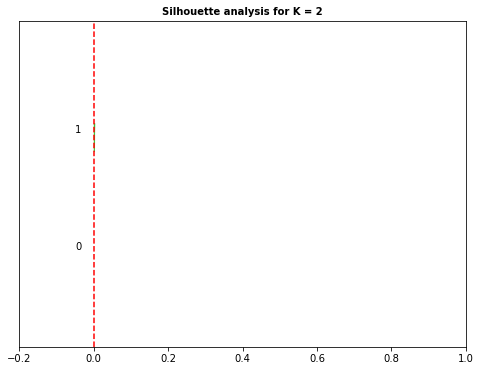

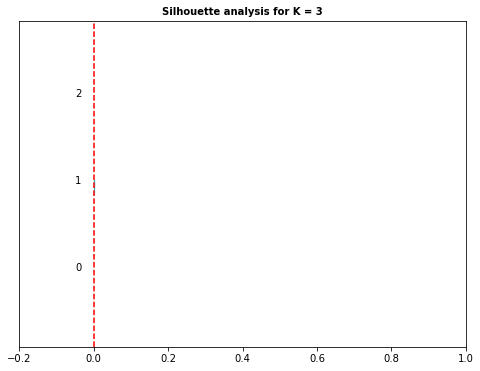

In [48]:
silhouette(kmeans_results, final_df, plot=True)

In [49]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

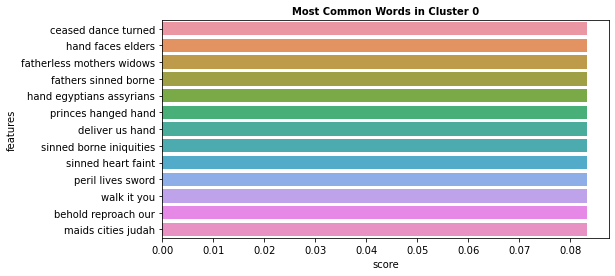

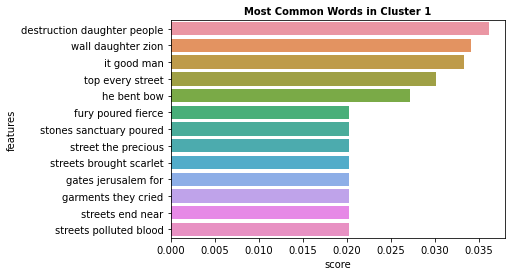

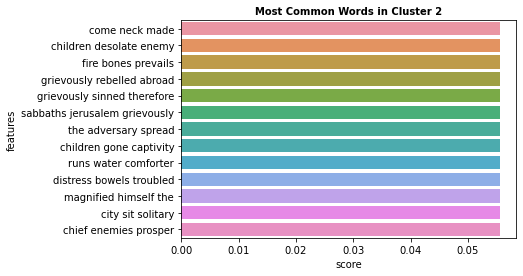

In [50]:
best_result = 3
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [51]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

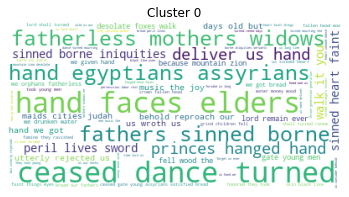

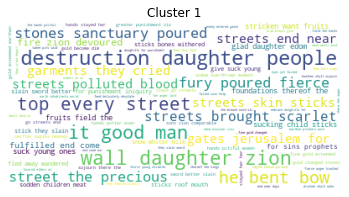

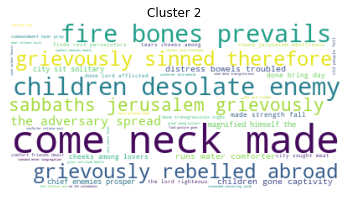

In [52]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [53]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Lamentações_1,"'city', 'sit', 'solitary', ',', 'full', 'peopl...",2
101,Lamentações_2,"'lord', 'covered', 'daughter', 'zion', 'cloud'...",1
102,Lamentações_3,"'man', 'seen', 'affliction', 'rod', 'wrath.he'...",1
103,Lamentações_4,"'gold', 'become', 'dim', '!', 'fine', 'gold', ...",1
104,Lamentações_5,"'remember', ',', 'lord', ',', 'come', 'us', ':...",0
